<a href="https://colab.research.google.com/github/vaas-umputer/Nutritional-analysis/blob/main/starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
food=pd.read_csv("starbucks-menu-nutrition-food.csv",encoding="UTF-16le")
drinks=pd.read_csv("starbucks_drinkMenu_expanded.csv")

**EDA FOR FOODS**

In [3]:
food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [4]:
food.rename(columns={"Unnamed: 0":"Item"},inplace=True)

In [5]:
food.columns

Index(['Item', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [6]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [7]:
food.rename(columns={" Calories":"Calories"},inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


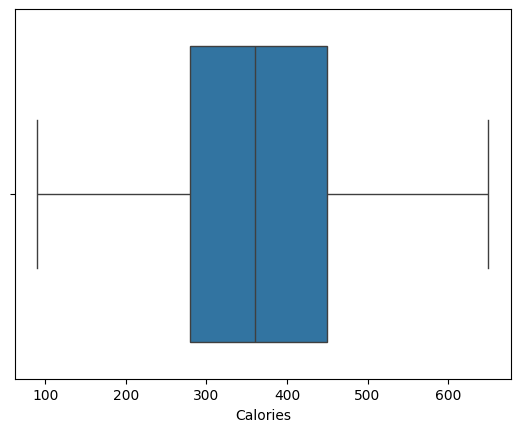

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


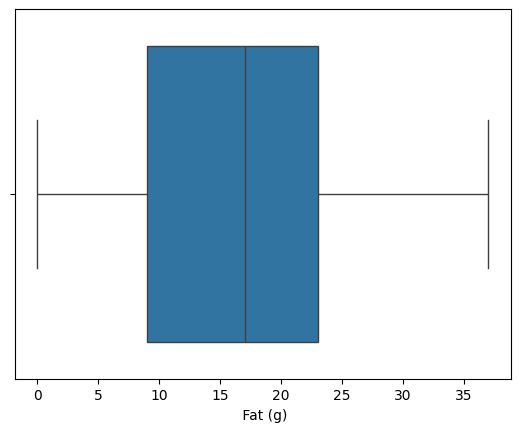

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


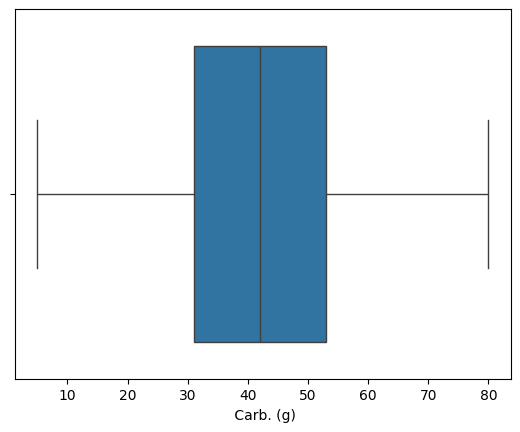

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


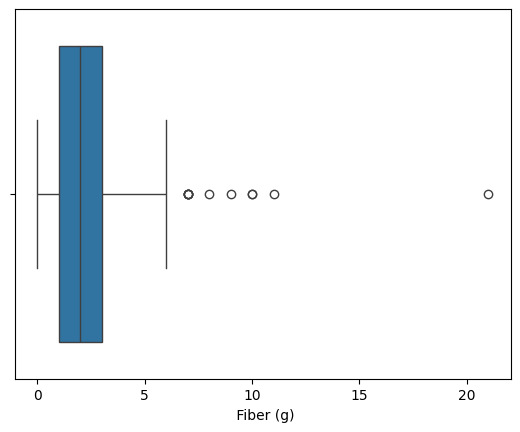

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


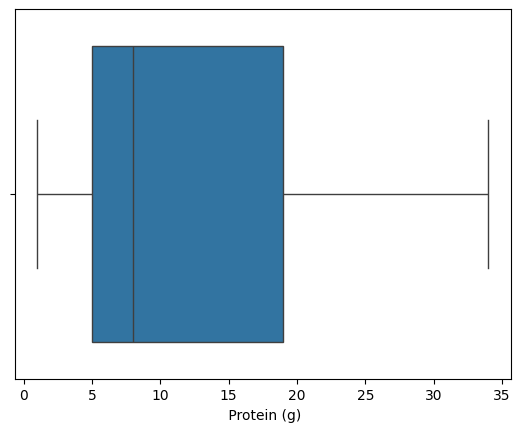

In [8]:
for i in food.select_dtypes(include="number"):
  sns.boxplot(data=food,x=food[i])
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'boxplots for all the numeric columns')

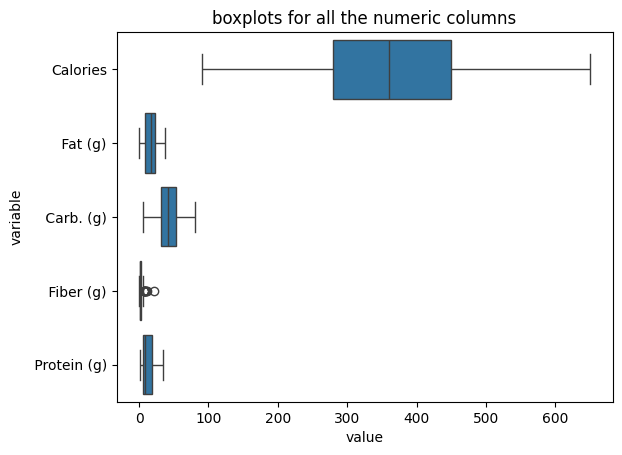

In [9]:
numeric_columns=food.select_dtypes(include="number")
food_melted=pd.melt(numeric_columns)

#plotting
sns.boxplot(data=food_melted,y="variable",x="value")
plt.title("boxplots for all the numeric columns")

In [10]:
food_melted

,variable,value
0,Calories,300.0
1,Calories,380.0
2,Calories,410.0
3,Calories,460.0
4,Calories,420.0
...,...,...
560,Protein (g),4.0
561,Protein (g),7.0
562,Protein (g),18.0
563,Protein (g),1.0


In [11]:
#find count of calories
food_melted['variable'].value_counts()

,count
variable,
Calories,113
Fat (g),113
Carb. (g),113
Fiber (g),113
Protein (g),113


In [12]:
food_melted.value_counts()

variable      value
 Fiber (g)    1.0      25
              2.0      25
              3.0      21
              0.0      14
 Protein (g)  6.0      12
                       ..
 Fat (g)      32.0      1
              30.0      1
              4.5       1
              4.0       1
Calories      650.0     1
Name: count, Length: 170, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
# Using Plotly to create an interactive box plot
fig = px.box(food_melted, x="value", y="variable", title="Boxplots for all the numeric columns")

# Show the plot
fig.show()

In [ ]:
food_melted.groupby('variable').describe()

value                                                          
              count        mean         std   min    25%    50%    75%    max
variable                                                                     
 Carb. (g)    113.0   41.486726   15.796764   5.0   31.0   42.0   53.0   80.0
 Fat (g)      113.0   16.353982    8.297397   0.0    9.0   17.0   23.0   37.0
 Fiber (g)    113.0    2.849558    2.888466   0.0    1.0    2.0    3.0   21.0
 Protein (g)  113.0   11.469027    8.463230   1.0    5.0    8.0   19.0   34.0
Calories      113.0  356.637168  127.710685  90.0  280.0  360.0  450.0  650.0

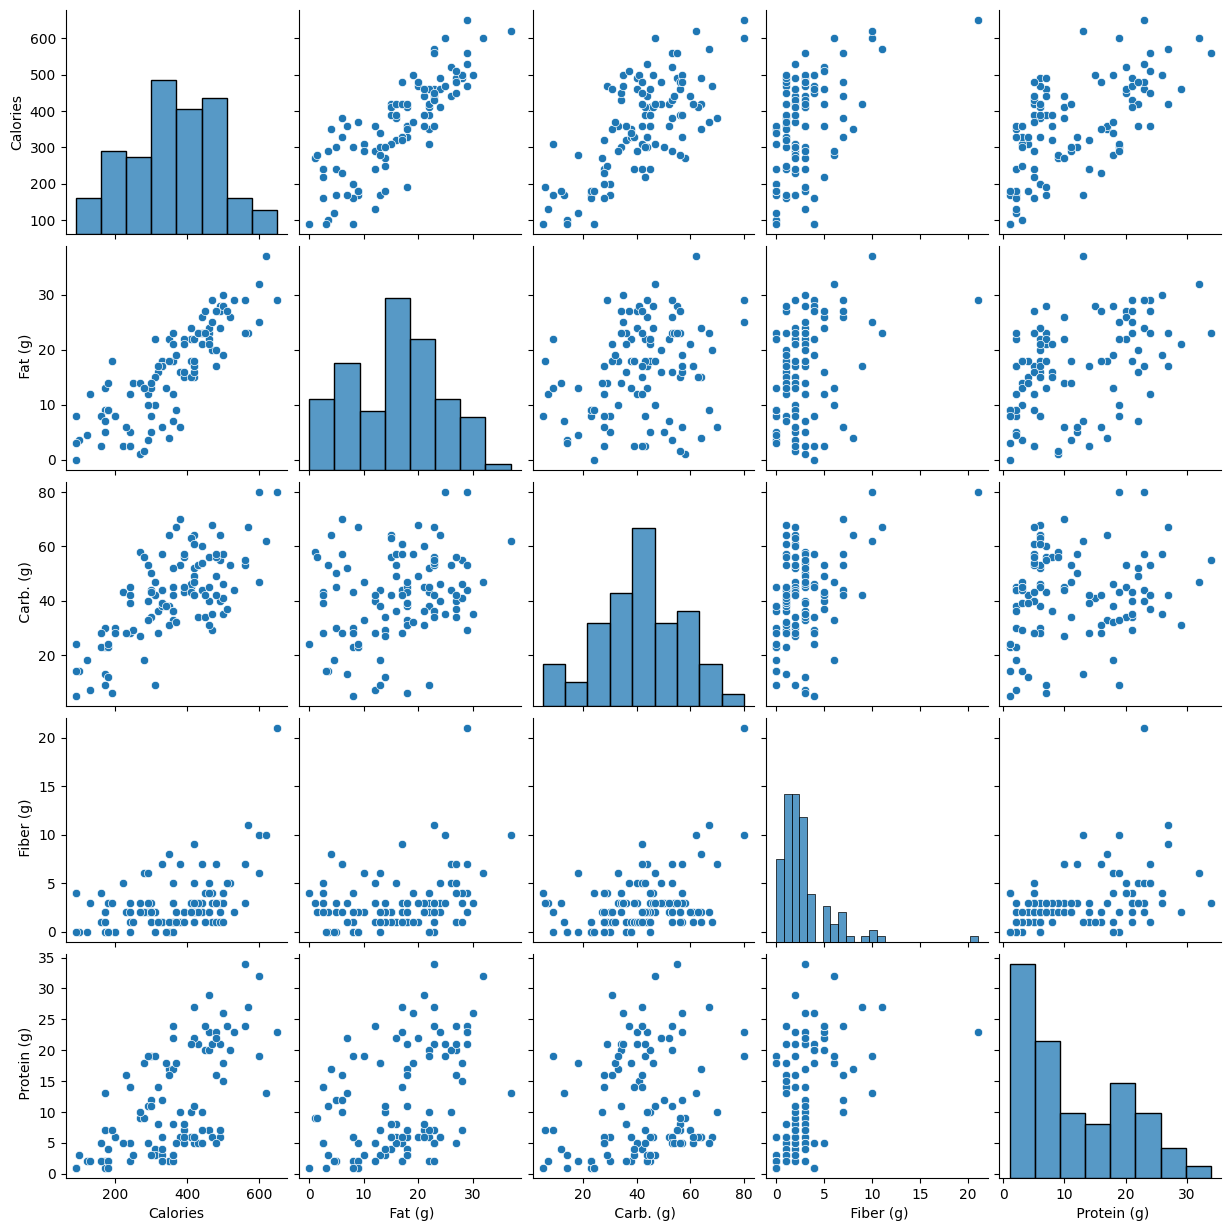

In [13]:
sns.pairplot(food)

In [14]:
correlation_matrix = food.iloc[:,1:].corr()
correlation_matrix

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
Calories,1.000000,0.828929,0.708496,0.471079,0.618962
Fat (g),0.828929,1.000000,0.281132,0.276059,0.423364
Carb. (g),0.708496,0.281132,1.000000,0.407655,0.204375
Fiber (g),0.471079,0.276059,0.407655,1.000000,0.472246
Protein (g),0.618962,0.423364,0.204375,0.472246,1.000000


<Axes: >

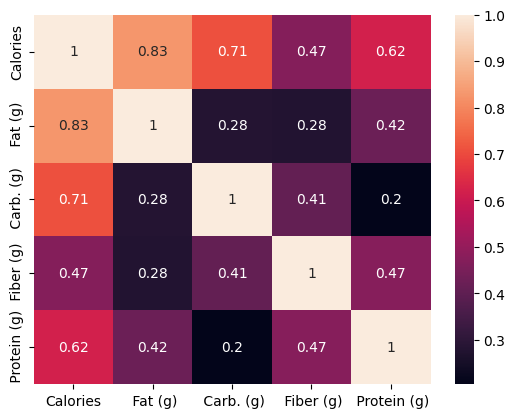

In [15]:
#heatmap along with negative correlation
sns.heatmap(correlation_matrix,annot=True)


In [16]:
food.columns

Index(['Item', 'Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [17]:
for i in food.columns:
  food.rename(columns={i:i.strip()},inplace=True)

In [18]:
food.columns

Index(['Item', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)'], dtype='object')

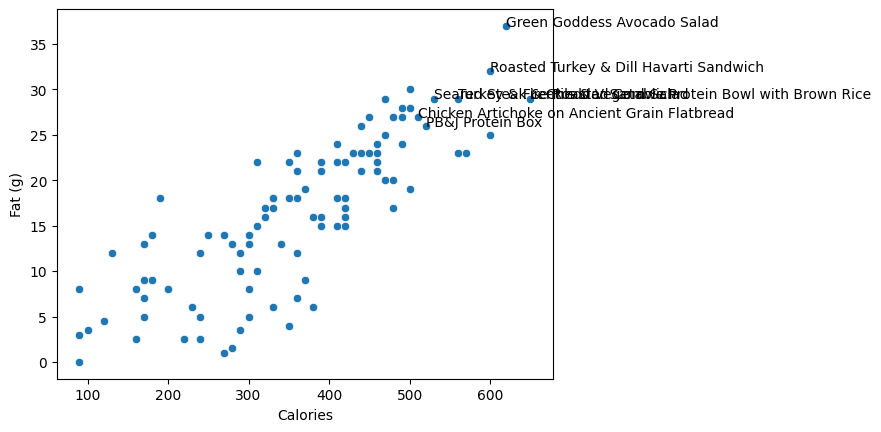

In [19]:
sns.scatterplot(data=food, x="Calories", y="Fat (g)")
for i in range(len(food)):
  if(food["Calories"].iloc[i] > 500 and food["Fat (g)"].iloc[i]>25):
    plt.text(food["Calories"].iloc[i],food["Fat (g)"].iloc[i],food["Item"].iloc[i])
plt.show()

Inference 1 : avoid all these foods with high calories and fat

In [20]:
food.columns

Index(['Item', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)'], dtype='object')

In [21]:
food.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


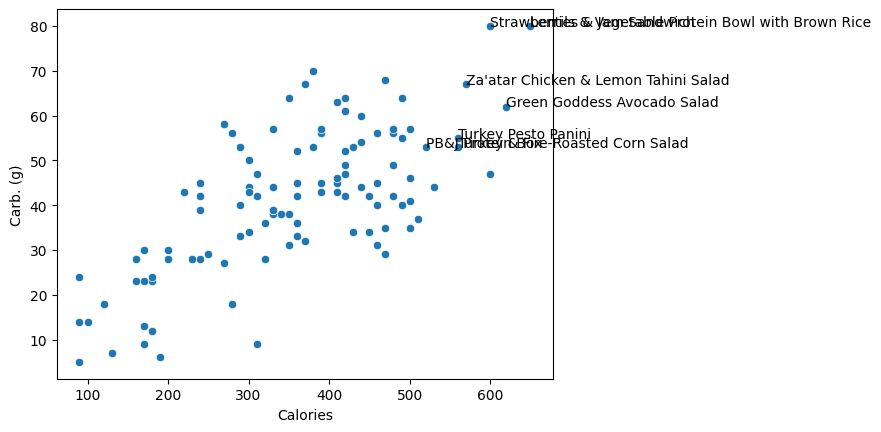

['Strawberries & Jam Sandwich', 'Green Goddess Avocado Salad', 'Turkey & Fire-Roasted Corn Salad', "Za'atar Chicken & Lemon Tahini Salad", 'PB&J Protein Box', 'Lentils & Vegetable Protein Bowl with Brown Rice', 'Turkey Pesto Panini']


In [22]:
sns.scatterplot(data=food, x="Calories", y="Carb. (g)")
val=[]
for i in range(len(food)):
  if(food["Calories"].iloc[i]>500 and food["Carb. (g)"].iloc[i]>50):
    val+=[food["Item"].iloc[i]]
    plt.text(food["Calories"].iloc[i],food["Carb. (g)"].iloc[i],food["Item"].iloc[i])
plt.show()
print(val)

Inference 2 : foods with higher calories and carbs are a bit undesirable

<Axes: xlabel='Calories', ylabel='Fat (g)'>

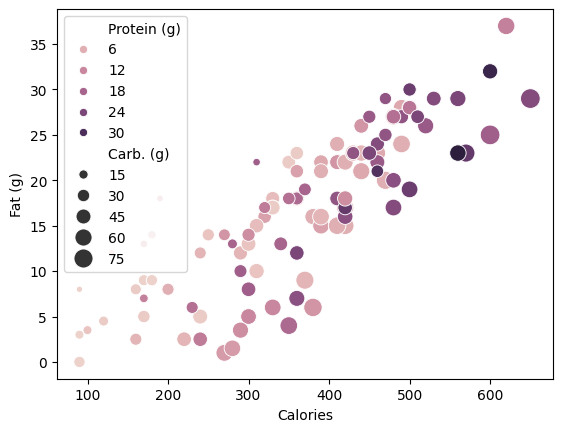

In [23]:
#multivariate graph fro calories, fats and carbs (remove one (size/hue) you get trivariate)
sns.scatterplot(data=food, x="Calories", y="Fat (g)",size="Carb. (g)",sizes=(20,200), hue="Protein (g)")

Inference 3 : higher fat foods tend to have higher calories

Inference 4 : as proteins increases, calories increases

In [24]:
food["Carb. (g)"].unique()

array([50, 70, 45, 56, 52, 53, 61, 28, 38, 36, 30, 42, 60, 43, 64, 58, 57,
       46, 55, 54, 14, 29, 68, 47, 40, 39, 18, 63, 67, 44, 23, 27, 80, 34,
       33,  7,  9, 62, 31, 49, 24, 32, 41, 13, 35, 37, 12,  6,  5])

**EDA FOR DRINKS**

In [25]:
drinks.dtypes

,0
Beverage_category,object
Beverage,object
Beverage_prep,object
Calories,int64
Total Fat (g),object
Trans Fat (g),float64
Saturated Fat (g),float64
Sodium (mg),int64
Total Carbohydrates (g),int64
Cholesterol (mg),int64


In [26]:
numbers=drinks.select_dtypes(include="number")
numbers

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,3,0.0,0.0,0,5,0,0,0,0.3
1,4,0.0,0.0,0,10,0,0,0,0.5
2,5,0.0,0.0,0,10,0,0,0,1.0
3,5,0.0,0.0,0,10,0,0,0,1.0
4,70,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...
237,320,0.4,0.0,0,250,67,1,64,5.0
238,170,0.1,0.0,0,160,39,0,38,4.0
239,200,2.0,0.1,10,160,39,0,38,3.0
240,180,0.2,0.0,0,160,37,1,35,3.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


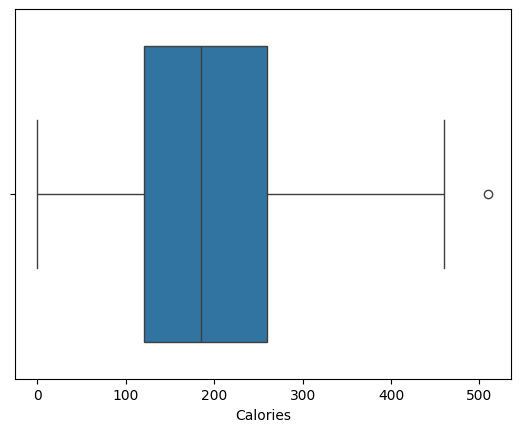

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


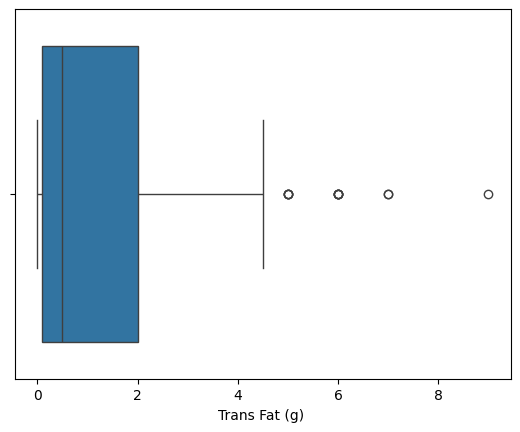

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


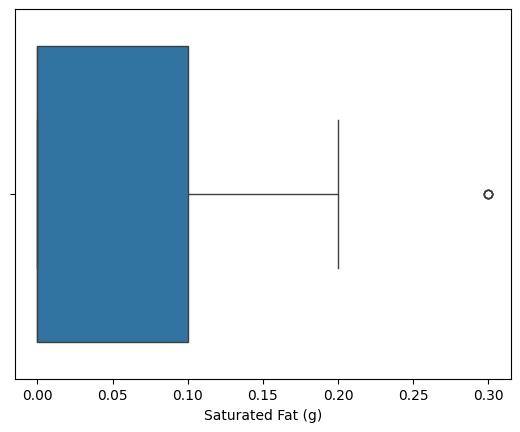

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


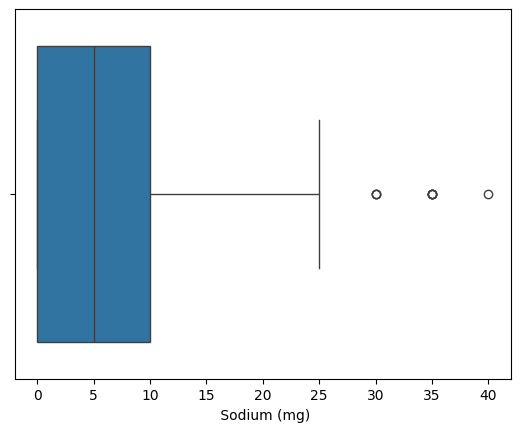

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


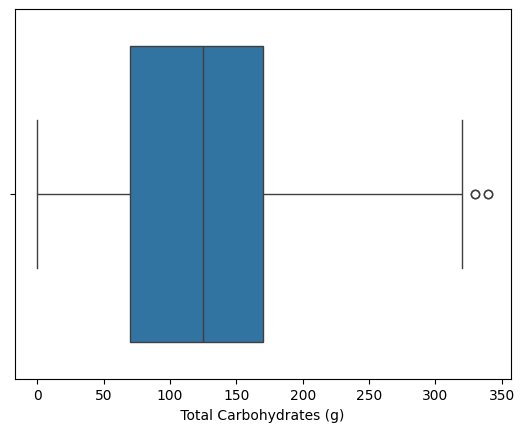

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


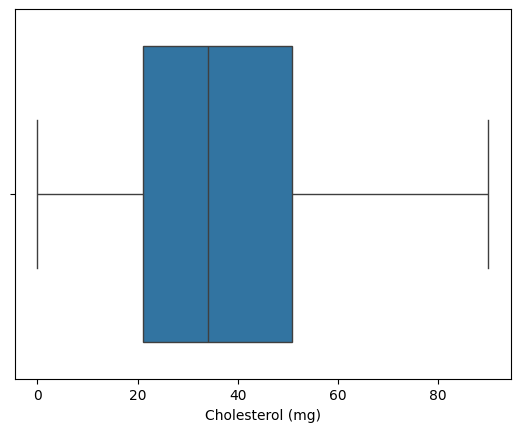

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


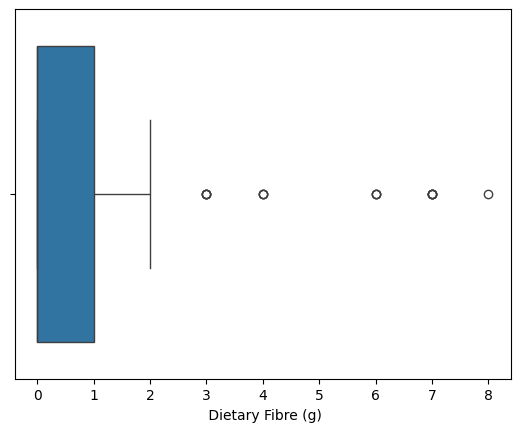

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


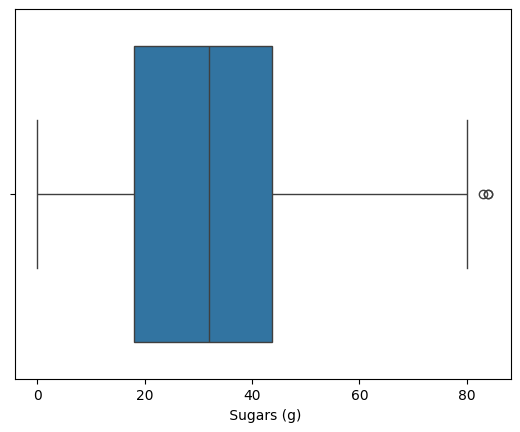

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


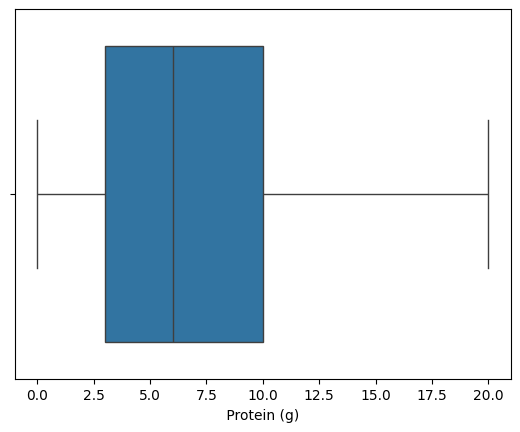

In [27]:
for i in numbers.columns:
  sns.boxplot(data=drinks,x=drinks[i])
  plt.show()

In [28]:
drinks_melted=pd.melt(numbers)
drinks_melted

,variable,value
0,Calories,3.0
1,Calories,4.0
2,Calories,5.0
3,Calories,5.0
4,Calories,70.0
...,...,...
2173,Protein (g),5.0
2174,Protein (g),4.0
2175,Protein (g),3.0
2176,Protein (g),3.0


In [29]:
drinks_melted["variable"].unique()

array(['Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) '], dtype=object)

In [30]:
for i in drinks.columns:
  drinks.rename(columns={i:i.strip()},inplace=True)

In [31]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [32]:
drinks_melted

,variable,value
0,Calories,3.0
1,Calories,4.0
2,Calories,5.0
3,Calories,5.0
4,Calories,70.0
...,...,...
2173,Protein (g),5.0
2174,Protein (g),4.0
2175,Protein (g),3.0
2176,Protein (g),3.0


In [33]:
drinks_melted["variable"].unique()

array(['Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
       ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) '], dtype=object)

In [34]:
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
drinks["Caffeine (mg)"].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [35]:
drinks.loc[(drinks["Caffeine (mg)"]=="varies") | (drinks["Caffeine (mg)"]=="varies ")]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,varies
136,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,15%,0%,25%,0.00%,varies
137,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,190,4,2.0,0.1,15,95,31,0,30,7.0,10%,0%,25%,0.00%,varies
138,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8%,0%,25%,10.00%,varies
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15%,0%,30%,0.00%,varies


In [36]:
drinks["Total Fat (g)"].max()

'9'

In [37]:
drinks["Total Fat (g)"].loc[drinks["Total Fat (g)"]=="3 2"]="3.2"

<ipython-input-37-c5c6febf9306>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  drinks["Total Fat (g)"].loc[drinks["Total Fat (g)"]=="3 2"]="3.2"
<ipython-input-37-c5c6febf9306>:1: SettingWithCopyWarning: 
A value is trying to be set on a c

In [38]:
drinks["Total Fat (g)"]=drinks["Total Fat (g)"].astype("float64")

In [39]:
drinks["Total Fat (g)"].unique()

array([ 0.1,  3.5,  2.5,  0.2,  6. ,  4.5,  0.3,  7. ,  5. ,  0.4,  9. ,
        1.5,  4. ,  2. ,  8. ,  3. , 11. ,  0. ,  1. , 10. , 15. , 13. ,
        0.5,  3.2])

In [40]:
drinks["Caffeine (mg)"].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [41]:
#find number of null values in caffeine column
drinks["Caffeine (mg)"].isnull().sum()

1

In [42]:
#take average of values in caffeine column
#values are string
avg=drinks.loc[(drinks["Caffeine (mg)"]!="Varies") & (drinks["Caffeine (mg)"]!="varies") & (drinks["Caffeine (mg)"].notnull())]["Caffeine (mg)"].astype(float).mean()
avg

89.52054794520548

In [43]:
drinks.loc[drinks["Caffeine (mg)"].isin(["varies","Varies"]),"Caffeine (mg)"]=avg.round()

In [44]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [45]:
drinks["Caffeine (mg)"].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 90.0, '50', '70', '120', '55',
       '80', '110', '165', '235', '90', nan, '125', '170', '15', '130',
       '140', '100', '145', '65', '105'], dtype=object)

In [46]:
drinks["Caffeine (mg)"]=drinks["Caffeine (mg)"].astype("float64")

In [47]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [48]:
drinks["Vitamin A (% DV)"].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [49]:
for index,row in drinks.iterrows():
  drinks.loc[index,"Vitamin A (% DV)"]=row["Vitamin A (% DV)"].split("%")[0]

In [50]:
drinks["Vitamin A (% DV)"].unique()

array(['0', '10', '6', '15', '20', '30', '25', '8', '4', '2', '50'],
      dtype=object)

In [51]:
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0%,20%,0%,75.0


In [52]:
for index,row in drinks.iterrows():
  drinks.loc[index,"Vitamin C (% DV)"]=row["Vitamin C (% DV)"].split("%")[0]
  drinks.loc[index,"Calcium (% DV)"]=row["Calcium (% DV)"].split("%")[0]
  drinks.loc[index,"Iron (% DV)"]=row["Iron (% DV)"].split("%")[0]

In [53]:
drinks["Vitamin A (% DV)"]=drinks["Vitamin A (% DV)"].astype("float64")
drinks["Vitamin C (% DV)"]=drinks["Vitamin C (% DV)"].astype("float64")
drinks["Calcium (% DV)"]=drinks["Calcium (% DV)"].astype("float64")
drinks["Iron (% DV)"]=drinks["Iron (% DV)"].astype("float64")

In [54]:
numbers=drinks.select_dtypes(include="number")
numbers

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0.0
238,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0.0
239,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0.0
240,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0.0


In [55]:
drinks_melted=pd.melt(numbers)
drinks_melted

,variable,value
0,Calories,3.0
1,Calories,4.0
2,Calories,5.0
3,Calories,5.0
4,Calories,70.0
...,...,...
3625,Caffeine (mg),0.0
3626,Caffeine (mg),0.0
3627,Caffeine (mg),0.0
3628,Caffeine (mg),0.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='value', ylabel='variable'>

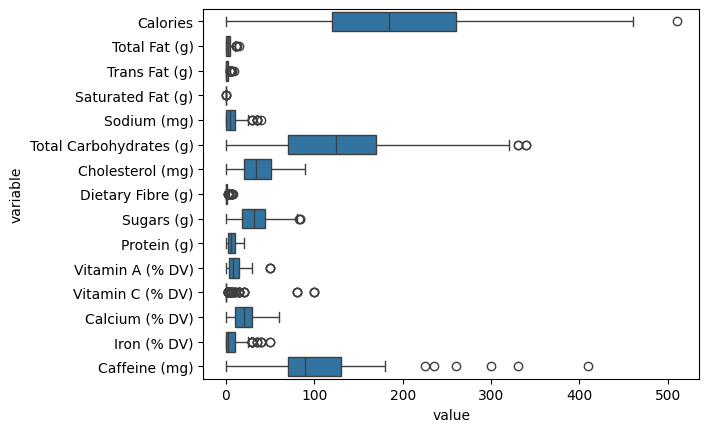

In [56]:
sns.boxplot(data=drinks_melted,x=drinks_melted["value"],y=drinks_melted["variable"])

In [ ]:
corr_matrix=drinks.select_dtypes(include="number").corr()
corr_matrix

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Calories,1.000000,0.632785,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820,0.215433,0.518720,0.427153,-0.044941
Total Fat (g),0.632785,1.000000,0.890175,0.619264,0.587177,0.449546,0.372713,0.259380,0.330443,0.550480,0.320870,-0.029391,0.619749,0.512175,0.108176
Trans Fat (g),0.642818,0.890175,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293,-0.048238,0.489494,0.344880,0.132862
Saturated Fat (g),0.331047,0.619264,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557,-0.043146,0.287097,-0.066863,0.020281
Sodium (mg),0.387892,0.587177,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001,0.023867,0.462052,-0.101201,0.054234
Total Carbohydrates (g),0.795037,0.449546,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687,0.016623,0.404887,0.306757,0.066009
Cholesterol (mg),0.940034,0.372713,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821,0.223852,0.263574,0.356257,-0.107447
Dietary Fibre (g),0.384292,0.259380,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673,0.709267,0.147316,0.584519,-0.178886
Sugars (g),0.909675,0.330443,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738,0.118918,0.236040,0.260414,-0.093486
Protein (g),0.578453,0.550480,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796,0.360997,0.839942,0.358413,0.023224


<Axes: >

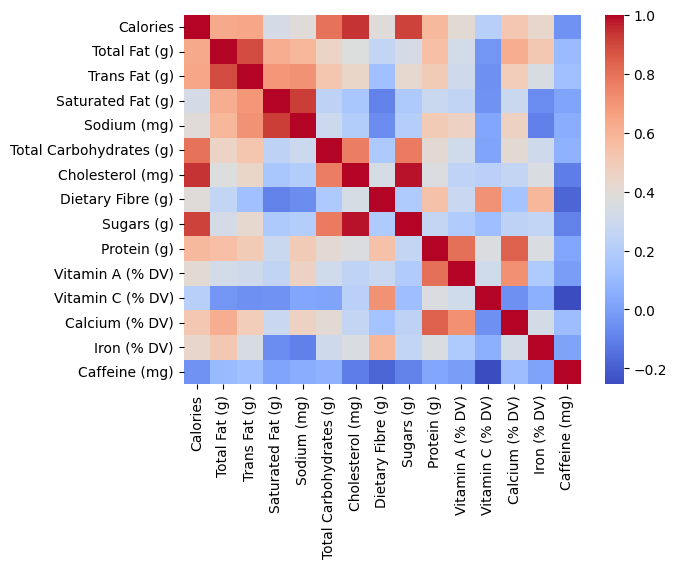

In [ ]:
sns.heatmap(corr_matrix,cmap="coolwarm")

In [ ]:
corr_matrix.shape

(15, 15)

In [ ]:
#find pairs of correlation > 0.6
#find those pairs of headings and store in an array
#print the array
a=[]
for i in range(len(corr_matrix)):
  for j in range(i+1,len(corr_matrix)):
    if(corr_matrix.iloc[i,j]>=0.8 ):
      a+=[[corr_matrix.columns[i],corr_matrix.columns[j]]]
a

[['Calories', 'Cholesterol (mg)'],
 ['Calories', 'Sugars (g)'],
 ['Total Fat (g)', 'Trans Fat (g)'],
 ['Saturated Fat (g)', 'Sodium (mg)'],
 ['Cholesterol (mg)', 'Sugars (g)'],
 ['Protein (g)', 'Calcium (% DV)']]

<Axes: xlabel='Calories', ylabel='Cholesterol (mg)'>

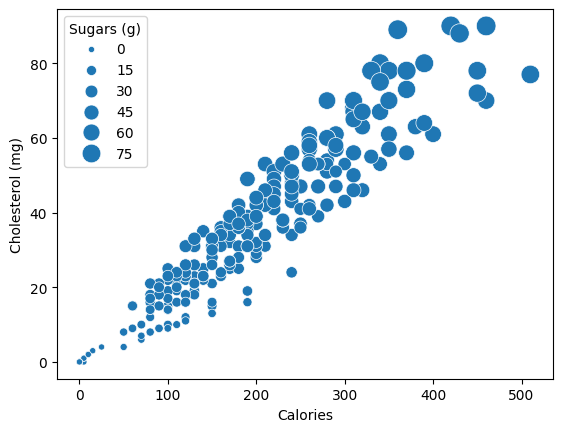

In [ ]:
#multivariate graph fro calories, fats and carbs (remove one (size/hue) you get trivariate)
sns.scatterplot(data=drinks, x="Calories", y="Cholesterol (mg)",size="Sugars (g)",sizes=(20,200))

In [57]:
food

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


In [58]:
drinks

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0.0


In [70]:
combined_meal=[]
for food_index, food_item in food.iterrows():
  for drink_index, drink_item in drinks.iterrows():
    total_calories=food_item['Calories']+drink_item['Calories']
    total_fat=food_item['Fat (g)']+drink_item['Total Fat (g)']
    total_carb=food_item['Carb. (g)']+drink_item['Total Carbohydrates (g)']
    total_protein=food_item['Protein (g)']+drink_item['Protein (g)']
    combined_meal.append({
        'Food':food_item['Item'],
        'Beverage_category':drink_item['Beverage_category'],
        'Beverage':drink_item['Beverage'],
        'Beverage_prep':drink_item['Beverage_prep'],
        'Total_calories':total_calories,
        'Total_fat':total_fat,
        'Total Carbs':total_carb,
        'Total_proteins':total_protein
        })
combined_meal


[{'Food': 'Chonga Bagel',
  'Beverage_category': 'Coffee',
  'Beverage': 'Brewed Coffee',
  'Beverage_prep': 'Short',
  'Total_calories': 303,
  'Total_fat': 5.1,
  'Total Carbs': 55,
  'Total_proteins': 12.3},
 {'Food': 'Chonga Bagel',
  'Beverage_category': 'Coffee',
  'Beverage': 'Brewed Coffee',
  'Beverage_prep': 'Tall',
  'Total_calories': 304,
  'Total_fat': 5.1,
  'Total Carbs': 60,
  'Total_proteins': 12.5},
 {'Food': 'Chonga Bagel',
  'Beverage_category': 'Coffee',
  'Beverage': 'Brewed Coffee',
  'Beverage_prep': 'Grande',
  'Total_calories': 305,
  'Total_fat': 5.1,
  'Total Carbs': 60,
  'Total_proteins': 13.0},
 {'Food': 'Chonga Bagel',
  'Beverage_category': 'Coffee',
  'Beverage': 'Brewed Coffee',
  'Beverage_prep': 'Venti',
  'Total_calories': 305,
  'Total_fat': 5.1,
  'Total Carbs': 60,
  'Total_proteins': 13.0},
 {'Food': 'Chonga Bagel',
  'Beverage_category': 'Classic Espresso Drinks',
  'Beverage': 'Caffè Latte',
  'Beverage_prep': 'Short Nonfat Milk',
  'Total_ca

In [71]:
combined_meal_df=pd.DataFrame(combined_meal)
combined_meal_df

,Food,Beverage_category,Beverage,Beverage_prep,Total_calories,Total_fat,Total Carbs,Total_proteins
0,Chonga Bagel,Coffee,Brewed Coffee,Short,303,5.1,55,12.3
1,Chonga Bagel,Coffee,Brewed Coffee,Tall,304,5.1,60,12.5
2,Chonga Bagel,Coffee,Brewed Coffee,Grande,305,5.1,60,13.0
3,Chonga Bagel,Coffee,Brewed Coffee,Venti,305,5.1,60,13.0
4,Chonga Bagel,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,370,5.1,125,18.0
...,...,...,...,...,...,...,...,...
27341,Seasonal Fruit Blend,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,410,3.2,274,6.0
27342,Seasonal Fruit Blend,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,260,0.1,184,5.0
27343,Seasonal Fruit Blend,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,290,3.5,184,4.0
27344,Seasonal Fruit Blend,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,270,1.5,184,4.0


In [72]:
from sklearn.neighbors import NearestNeighbors

In [73]:
features=['Total_calories','Total_fat','Total Carbs','Total_proteins']
X=combined_meal_df[features]

In [74]:
X

,Total_calories,Total_fat,Total Carbs,Total_proteins
0,303,5.1,55,12.3
1,304,5.1,60,12.5
2,305,5.1,60,13.0
3,305,5.1,60,13.0
4,370,5.1,125,18.0
...,...,...,...,...
27341,410,3.2,274,6.0
27342,260,0.1,184,5.0
27343,290,3.5,184,4.0
27344,270,1.5,184,4.0


In [75]:
model=NearestNeighbors(n_neighbors=4)
model.fit(X)

NearestNeighbors(n_neighbors=4)

In [80]:
# Example user preferences
user_nutritional_profile = [[500, 15,50,20]]

In [81]:
distances,indices=model.kneighbors(user_nutritional_profile)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [84]:
recommended_meals=combined_meal_df.iloc[indices[0]]
recommended_meals

,Food,Beverage_category,Beverage,Beverage_prep,Total_calories,Total_fat,Total Carbs,Total_proteins
17349,BBQ Chicken Protein Box,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,500,16.0,49,22.0
21693,Seared Steak Egg & Tomatillo Wrap,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Grande,500,18.1,48,21.3
18490,Smoked Turkey Protein Box,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,500,12.0,52,24.0
22847,Spinach Feta & Cage Free Egg White Breakfast Wrap,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Tall,500,10.0,48,19.0


Inference : above is the recommendation of meals to people with nutritional preferences

In [85]:
combined_meal_df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [86]:
combined_meal_df['Beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [87]:
combined_meal_df['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [94]:
categories=['Coffee',
 'Classic Espresso Drinks',
 'Signature Espresso Drinks',
 'Tazo® Tea Drinks',
 'Frappuccino® Blended Coffee',
 'Frappuccino® Light Blended Coffee',
 'Frappuccino® Blended Crème']

In [92]:
modifiers = ['Hot','Iced', 'Without Whipped Cream', 'With Classic Syrup']

In [93]:
names=['Brewed Coffee', 'Mocha', 'Latte', 'Espresso', 'Java Chip', 'Hot Chocolate', 'Strawberries & Crème']

COMPARING WITH MCD DATASET

In [95]:
mcd_dataset = pd.read_csv("mcd_menu.csv")

In [96]:
mcd_dataset

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [97]:
food

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


visualising and comparing calories, fat, carbs and proteins

In [98]:
mcd_dataset.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [100]:
mcd_dataset.isnull().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


In [109]:
S=food[['Item','Calories','Total Fat','Carbohydrates','Protein']]

In [110]:
S

,Item,Calories,Total Fat,Carbohydrates,Protein
0,Chonga Bagel,300,5.0,50,12
1,8-Grain Roll,380,6.0,70,10
2,Almond Croissant,410,22.0,45,10
3,Apple Fritter,460,23.0,56,7
4,Banana Nut Bread,420,22.0,52,6
...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,4
109,Justin's Classic Almond Butter,190,18.0,6,7
110,Lemon Chiffon Yogurt,340,13.0,38,18
111,Organic Avocado (Spread),90,8.0,5,1


In [104]:
mcd_dataset.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [105]:
M=mcd_dataset[['Item','Calories','Total Fat','Carbohydrates','Protein']]

In [106]:
M

,Item,Calories,Total Fat,Carbohydrates,Protein
0,Egg McMuffin,300,13.0,31,17
1,Egg White Delight,250,8.0,30,18
2,Sausage McMuffin,370,23.0,29,14
3,Sausage McMuffin with Egg,450,28.0,30,21
4,Sausage McMuffin with Egg Whites,400,23.0,30,21
...,...,...,...,...,...
255,McFlurry with Oreo Cookies (Small),510,17.0,80,12
256,McFlurry with Oreo Cookies (Medium),690,23.0,106,15
257,McFlurry with Oreo Cookies (Snack),340,11.0,53,8
258,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,114,21


In [107]:
#rename some columns in food dataset
food.rename(columns={"Fat (g)":"Total Fat","Carb. (g)":"Carbohydrates","Protein (g)":"Protein"},inplace=True)

In [108]:
food

,Item,Calories,Total Fat,Carbohydrates,Fiber (g),Protein
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6
...,...,...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1


In [119]:
# Assuming you have already processed your data to include common metrics
common_metrics = ['Calories', 'Total Fat', 'Protein', 'Carbohydrates']
starbucks_avg = S[common_metrics].mean()
mcdonalds_avg = M[common_metrics].mean()

# Combine for visualization
comparison_df = pd.DataFrame({'Starbucks': starbucks_avg, 'McDonald': mcdonalds_avg})

In [120]:
starbucks_avg

,0
Calories,356.637168
Total Fat,16.353982
Protein,11.469027
Carbohydrates,41.486726


In [121]:
comparison_df

,Starbucks,McDonald
Calories,356.637168,368.269231
Total Fat,16.353982,14.165385
Protein,11.469027,13.338462
Carbohydrates,41.486726,47.346154


<Axes: >

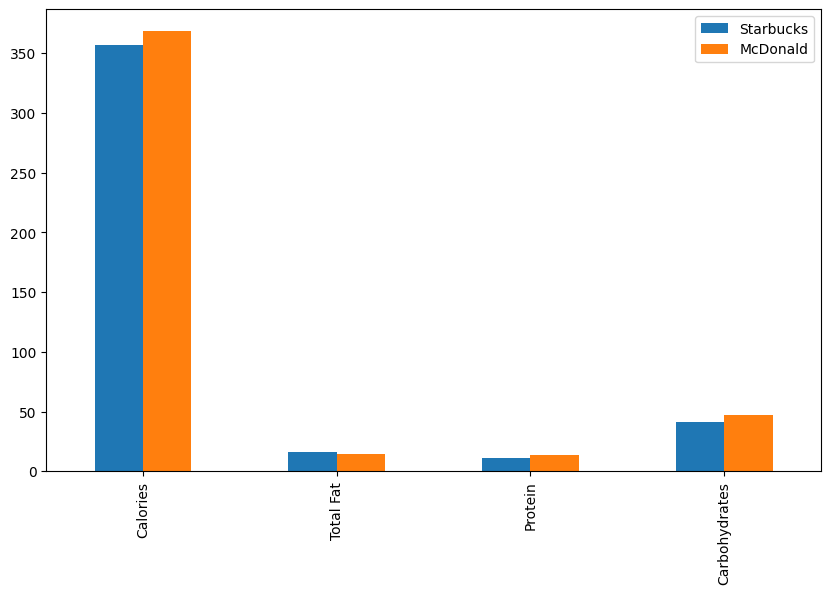

In [122]:
#plot stacked bar chart for each metric
comparison_df.plot(kind='bar', figsize=(10, 6))

In [125]:
import plotly.express as px

In [129]:
fig = px.line_polar(comparison_df, r = 'McDonald', theta = ['Calories', 'Total Fat',  'Protein','Carbohydrates'], line_close = True)
fig.update_traces(line_color = 'blue')
fig.add_trace(px.line_polar(comparison_df, r = 'Starbucks', theta = ['Calories', 'Total Fat', 'Protein','Carbohydrates'], line_close = True).data[0])
fig.update_traces(fill = 'toself', line_color = 'red')
fig.show()